In [81]:
import pandas as pd #vscode 내부에서 jupyter 사용중입니다

insurance_df = pd.read_csv("C:/MyWorkspace/Python_MachineLearning/Data_PreProcessing/insurance.csv")
insurance_df.head()

,Number,age,Gender,bmi,children,smoker,region,Insurance Fee
0,1,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,2,18.0,male,33.770,1.0,no,southeast,1725.55230
2,3,28.0,male,33.000,3.0,no,southeast,4449.46200
3,4,33.0,male,22.705,0.0,no,northwest,21984.47061
4,5,32.0,male,28.880,0.0,no,northwest,3866.85520


In [82]:
insurance_df.drop(columns=['Number'], inplace=True)
insurance_df.head()

,age,Gender,bmi,children,smoker,region,Insurance Fee
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [83]:
insurance_df[insurance_df.duplicated()]

,age,Gender,bmi,children,smoker,region,Insurance Fee
505,62.0,female,39.20,0.0,no,southwest,13470.8600
506,29.0,male,34.40,0.0,yes,southwest,36197.6990
507,43.0,male,26.03,0.0,no,northeast,6837.3687
508,51.0,male,23.21,1.0,yes,southeast,22218.1149
509,19.0,male,30.25,0.0,yes,southeast,32548.3405
510,38.0,female,28.93,1.0,no,southeast,5974.3847
587,19.0,male,30.59,0.0,no,northwest,1639.5631


In [84]:
insurance_df.drop_duplicates(inplace=True)
insurance_df[insurance_df.duplicated()]

,age,Gender,bmi,children,smoker,region,Insurance Fee


In [85]:
insurance_df.isnull().sum()

age              2
Gender           2
bmi              1
children         1
smoker           1
region           1
Insurance Fee    2
dtype: int64

In [86]:
insurance_df.dropna(inplace=True)
insurance_df.isnull().sum()

age              0
Gender           0
bmi              0
children         0
smoker           0
region           0
Insurance Fee    0
dtype: int64

In [87]:
insurance_df.rename(columns={'Gender' : 'gender', 'Insurance Fee' : 'charges'}, inplace=True)
insurance_df.head()

,age,gender,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [88]:
insurance_df.replace({'gender' : {'female' : 1, 'male' : 0}}, inplace=True)
insurance_df.head()

,age,gender,bmi,children,smoker,region,charges
0,19.0,1,27.900,0.0,yes,southwest,16884.92400
1,18.0,0,33.770,1.0,no,southeast,1725.55230
2,28.0,0,33.000,3.0,no,southeast,4449.46200
3,33.0,0,22.705,0.0,no,northwest,21984.47061
4,32.0,0,28.880,0.0,no,northwest,3866.85520


In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
insurance_df[['charges']] = scaler.fit_transform(insurance_df[['charges']])

insurance_df.describe()

,age,gender,bmi,children,charges
count,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000
mean,39.227648,0.493614,30.639162,1.097671,0.194544
std,14.049537,0.500147,6.087904,1.206905,0.193577
min,18.000000,0.000000,15.960000,0.000000,0.000000
25%,27.000000,0.000000,26.220000,0.000000,0.057860
50%,39.000000,0.000000,30.360000,1.000000,0.131998
75%,51.000000,1.000000,34.600000,2.000000,0.250037
max,64.000000,1.000000,53.130000,5.000000,1.000000


<AxesSubplot:>

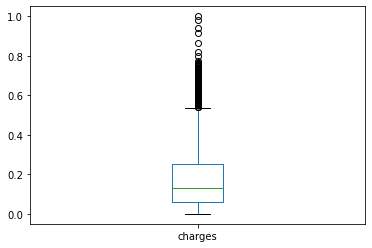

In [90]:
insurance_df['charges'].plot(kind="box")

<AxesSubplot:>

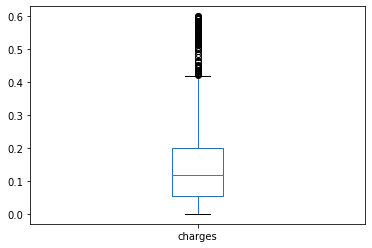

In [91]:
insurance_df.drop(insurance_df[insurance_df.charges >= 0.8].index, inplace=True) #알겠습니다
insurance_df['charges'].plot(kind="box")

<AxesSubplot:>

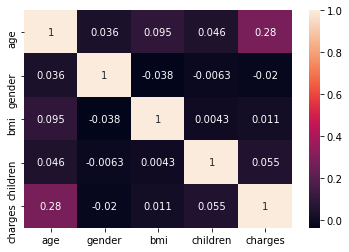

In [92]:
import matplotlib.pyplot as plt
import seaborn as sn

corrMatrix = insurance_df.corr()
sn.heatmap(corrMatrix, annot=True)

In [93]:
insurance_df.drop(columns=['gender'], inplace=True)
insurance_df.head() #고생하셨습니다

,age,bmi,children,smoker,region,charges
0,19.0,27.900,0.0,yes,southwest,0.251611
1,18.0,33.770,1.0,no,southeast,0.009636
2,28.0,33.000,3.0,no,southeast,0.053115
3,33.0,22.705,0.0,no,northwest,0.333010
4,32.0,28.880,0.0,no,northwest,0.043816
